# AES - Advanced Encryption Standard

<font size=4>

- AES is a Symmetric Block Cipher.
- Encrypts data in blocks of 128 bits each.
- AES performs operations on bytes of data rather than in bits. Since the block size is 128 bits, the cipher processes 128 bits (or 16 bytes) of the input data at a time.

</font>

<font size=4>

- The key size can be 128/192/256 bits.
    - 128-bit key – 10 rounds
    - 192-bit key – 12 rounds
    - 256-bit key – 14 rounds
</font>

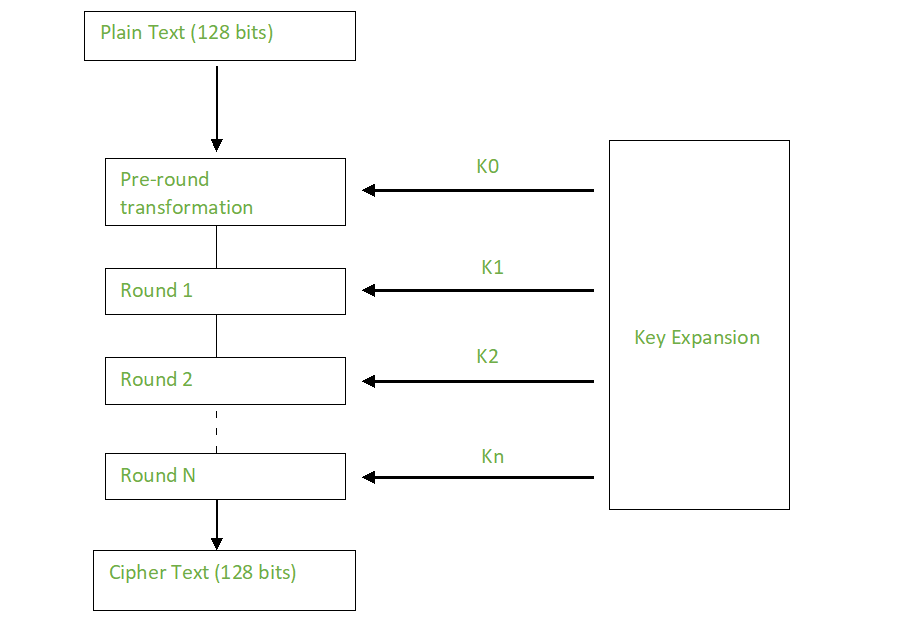

<font size=5>

`Each Round - 4 Transformations ( Round 1 to Round N-1 )` \
`Last Round - 3 Transformations`
    
</font>

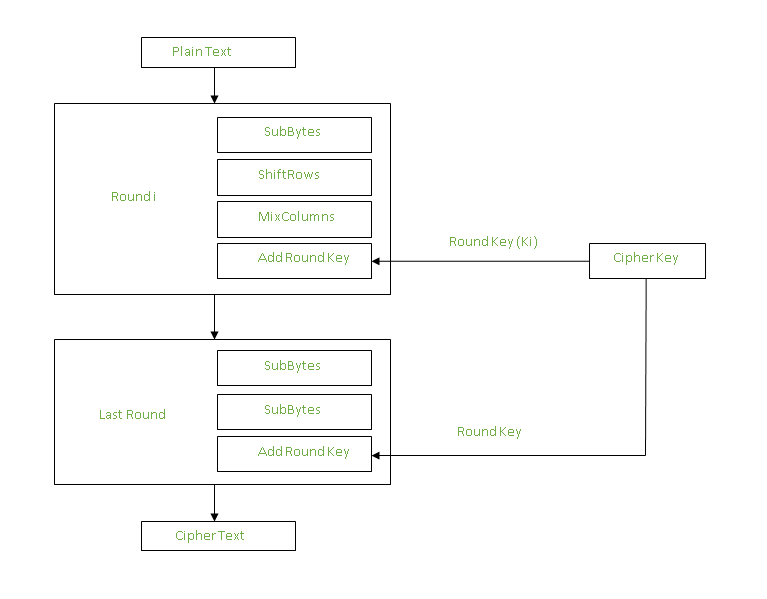

## Subsitute Bytes (s-box)
<font size=3>Each byte is substituted by another byte using a lookup table called the S-box.</font>

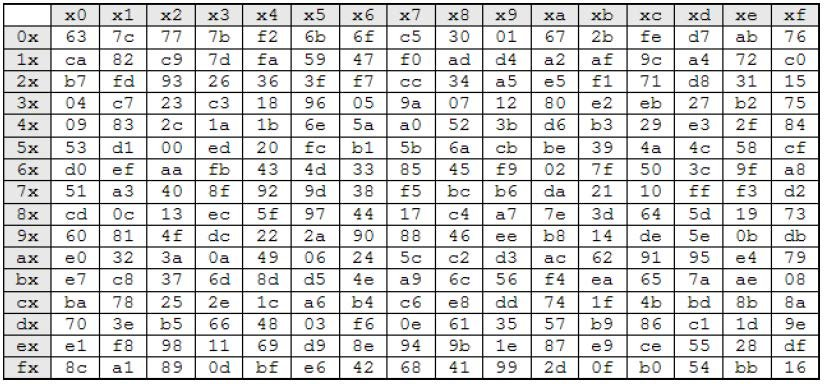

In [1]:
s_box = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)

## Inverse s-box
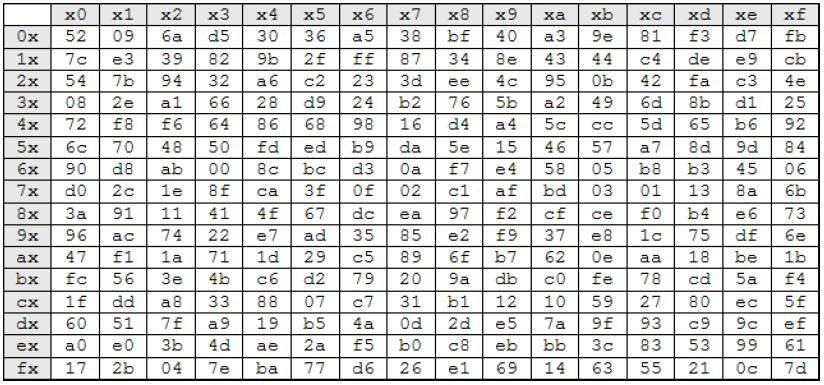

In [2]:
inv_s_box = (
    0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
    0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
    0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
    0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
    0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
    0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
    0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
    0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
    0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
    0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
    0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
    0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
    0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
    0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
    0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D,
)


In [3]:
def sub_bytes(s):
    for i in range(4):
        for j in range(4):
            s[i][j] = s_box[s[i][j]]
            
def inv_sub_bytes(s):
    for i in range(4):
        for j in range(4):
            s[i][j] = inv_s_box[s[i][j]]

## Shift Rows

<font size=3> Left circular shift is applied to the rows as follows: </font>
    - <font size=3> The first row is not shifted. </font>
    - <font size=3> The second row is shifted once to the left. </font>
    - <font size=3> The third row is shifted twice to the left. </font>
    - <font size=3> The fourth row is shifted thrice to the left. </font>

    
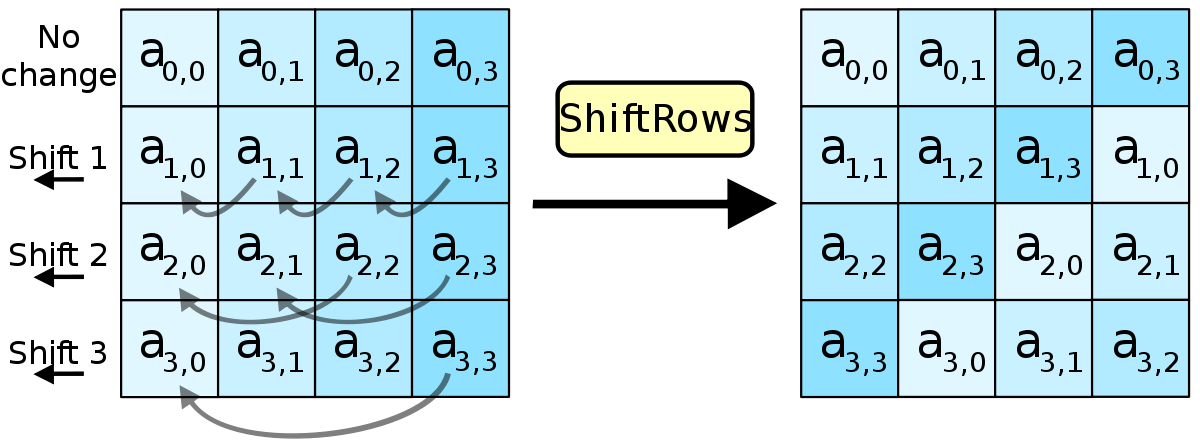

In [4]:
def shift_rows(s):
    s[1][0],s[1][1],s[1][2],s[1][3] = s[1][1],s[1][2],s[1][3],s[1][0]
    s[2][0],s[2][1],s[2][2],s[2][3] = s[2][2],s[2][3],s[2][0],s[2][1]
    s[3][0],s[3][1],s[3][2],s[3][3] = s[3][3],s[3][0],s[3][1],s[3][2]

## Inverse Shift Rows
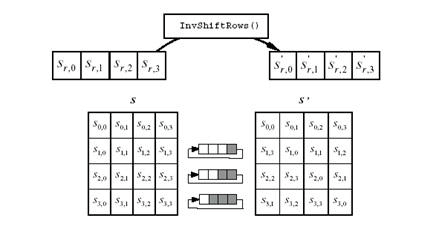

In [5]:
def inv_shift_rows(s):
    s[1][0],s[1][1],s[1][2],s[1][3] = s[1][3],s[1][0],s[1][1],s[1][2]
    s[2][0],s[2][1],s[2][2],s[2][3] = s[2][2],s[2][3],s[2][0],s[2][1]
    s[3][0],s[3][1],s[3][2],s[3][3] = s[3][1],s[3][2],s[3][3],s[3][0]

## Add Round Keys

<font size=3> Now the resultant output of the previous stage is XOR-ed with the corresponding round key. </font>


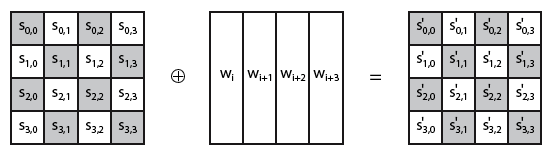

In [6]:
def add_round_key(s, k):
    for i in range(4):
        for j in range(4):
            s[i][j] ^= k[i][j]

## Mix columns

<font size=3> This step is basically a matrix multiplication. Each column is multiplied with a specific matrix and thus the position of each byte in the column is changed as a result.
</font>


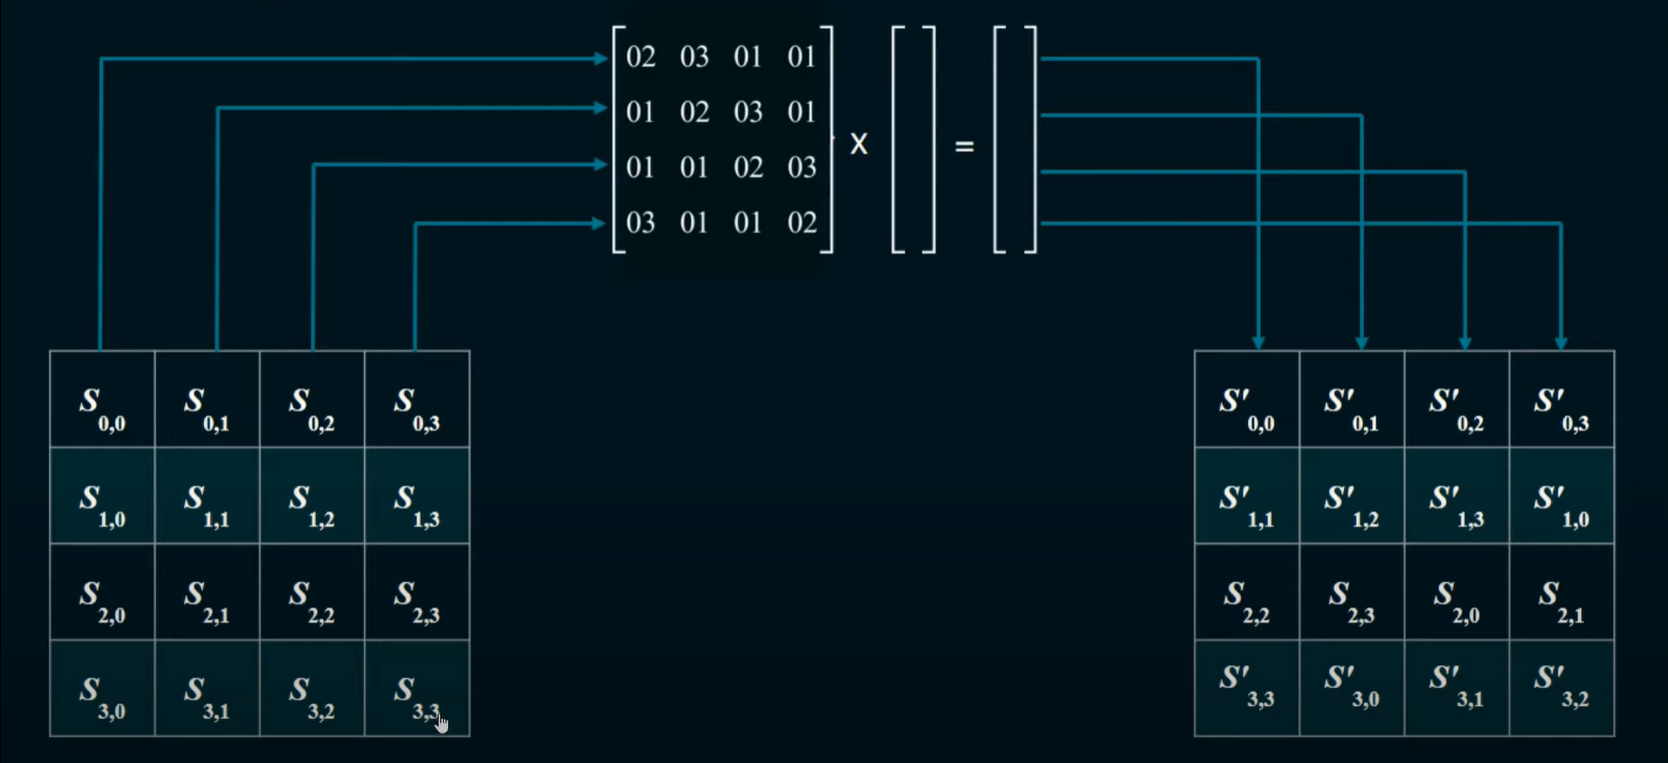

Each column in the state matrix is multiplied with the column in the fixed matrix. This is not regular multiplication. This is a special kind of multiplication used in cryptography.
- Multiplying by 1 is straightforward; it's just the value itself.
- Multiplying by 2 involves left shifting the number by one and XORing with 0x1B if the high bit had been one.
- Multiplying by 3 can be done by multiplying by 2 and then XORing with the original value, as 3 equals 2 XOR 1.

𝟹 = 𝟸⊕𝟷
 
𝟹×𝑥 = (𝟸⊕𝟷) × 𝑥 = (𝟸×𝑥) ⊕ 𝑥

Addition is represented by XORs

Demonstration of how to get inverse mix column works:

for every matrix M X M^-1 = I\
for this matrix in particular M^4 = I\
so for this matrix in particular M X M X M X M = I\
so for this matrix in particular M X (M X M X M) = I\
so for this matrix in particular M X M X M = M^-1

In [8]:
def multiply_by_2(v):
    #shifts v left by 1
    s = v << 1
    #ensure that the result is only 8 bits  by performing bitwise AND with 0xff (max value)
    s &= 0xff
    #checks if leftmost bit of v is set, this says that there is a carry
    if (v & 128) != 0:
        s = s ^ 0x1b
    return s


def multiply_by_3(v):
    return multiply_by_2(v) ^ v


def mix_columns(grid):
    #initialises new 4x4 grid to obtain the mixed columns
    new_grid = [[], [], [], []]
    for i in range(4):
        col = [grid[j][i] for j in range(4)]
        col = mix_column(col)
        for i in range(4):
            new_grid[i].append(col[i])
    return new_grid


def mix_column(column):
    r = [
        multiply_by_2(column[0]) ^ multiply_by_3(
            column[1]) ^ column[2] ^ column[3],
        multiply_by_2(column[1]) ^ multiply_by_3(
            column[2]) ^ column[3] ^ column[0],
        multiply_by_2(column[2]) ^ multiply_by_3(
            column[3]) ^ column[0] ^ column[1],
        multiply_by_2(column[3]) ^ multiply_by_3(
            column[0]) ^ column[1] ^ column[2],
    ]
    return r

In [9]:
a = [[1,2,30,4],[1,5,3,4],[1,9,3,4],[1,26,3,4]]
print("Original :", a)
mixed = mix_columns(a)
print("Mixed 1 : ", mixed)
unmixed = mix_columns(mixed)
print("Mixed 2 : ",unmixed)
unmixed = mix_columns(unmixed)
print("Mixed 3 : ",unmixed)
unmixed = mix_columns(unmixed)
print("Final Output : ",unmixed)

Original : [[1, 2, 30, 4], [1, 5, 3, 4], [1, 9, 3, 4], [1, 26, 3, 4]]
Mixed 1 :  [[1, 24, 57, 4], [1, 9, 30, 4], [1, 59, 30, 4], [1, 62, 36, 4]]
Mixed 2 :  [[1, 46, 106, 4], [1, 121, 3, 4], [1, 37, 119, 4], [1, 102, 3, 4]]
Mixed 3 :  [[1, 148, 165, 4], [1, 213, 246, 4], [1, 183, 130, 4], [1, 226, 204, 4]]
Final Output :  [[1, 2, 30, 4], [1, 5, 3, 4], [1, 9, 3, 4], [1, 26, 3, 4]]


## Round Constant

In [10]:
r_con = (
    0x00, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40,
    0x80, 0x1B, 0x36, 0x6C, 0xD8, 0xAB, 0x4D,
)

In [11]:
def bytes2matrix(text):
    """ Converts a 16-byte array into a 4x4 matrix.  """
    return [list(text[i:i+4]) for i in range(0, len(text), 4)]

def matrix2bytes(matrix):
    """ Converts a 4x4 matrix into a 16-byte array.  """
    return bytes(sum(matrix, []))

def xor_bytes(a, b):
    """ Returns a new byte array with the elements xor'ed. """
    return bytes(i^j for i, j in zip(a, b))

def inc_bytes(a):
    """ Returns a new byte array with the value increment by 1 """
    out = list(a)
    for i in reversed(range(len(out))):
        if out[i] == 0xFF:
            out[i] = 0
        else:
            out[i] += 1
            break
    return bytes(out)

In [12]:
def pad(plaintext):
    """
    Pads the given plaintext with PKCS#7 padding to a multiple of 16 bytes.
    Note that if the plaintext size is a multiple of 16,
    a whole block will be added.
    """
    padding_len = 16 - (len(plaintext) % 16)
    padding = bytes([padding_len] * padding_len)
    return plaintext + padding

def unpad(plaintext):
    """
    Removes a PKCS#7 padding, returning the unpadded text and ensuring the
    padding was correct.
    """
    padding_len = plaintext[-1]
    assert padding_len > 0
    message, padding = plaintext[:-padding_len], plaintext[-padding_len:]
    assert all(p == padding_len for p in padding)
    return message

def split_blocks(message, block_size=16, require_padding=True):
        # assert len(message) % block_size == 0 or not require_padding
        return [message[i:i+16] for i in range(0, len(message), block_size)]


## Encryption and Decryption

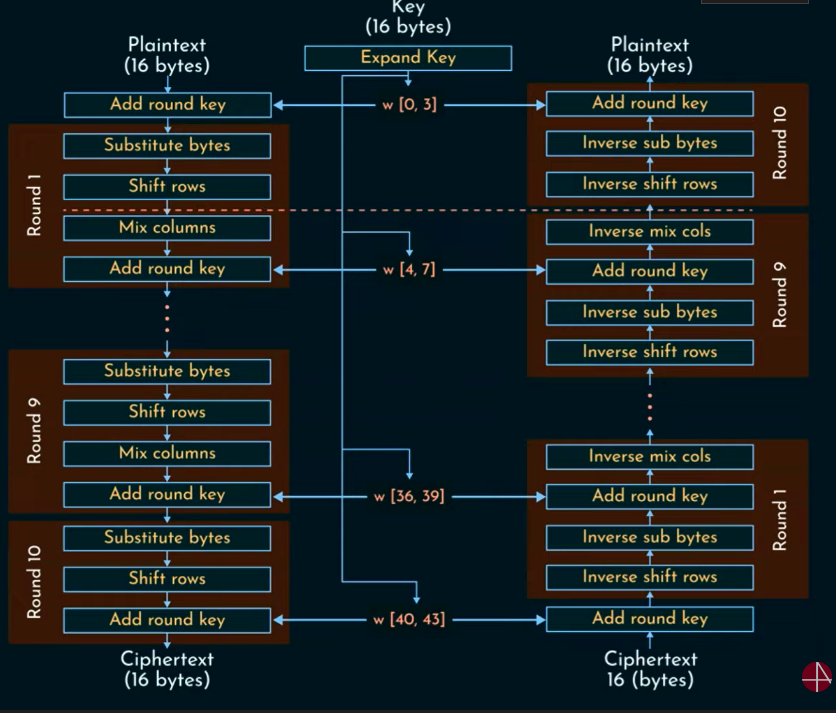

### Key Expansion
`128 bits - 16 bytes - 10 rounds`\
`192 bits - 24 bytes - 12 rounds`\
`256 bits - 32 bytes - 14 rounds`
- <font size=3>Each Round - 4 words for AES-128, 6 words for AES-192, and 8 words for AES-256</font>
- <font size=3>Total - 44 words for AES-128, 52 words for AES-192, and 60 words for AES-256</font> 

<font size=4>AES 128 Key Expansion -</font> 


<font size=3>The initial 16 bytes key is given as input </font> 

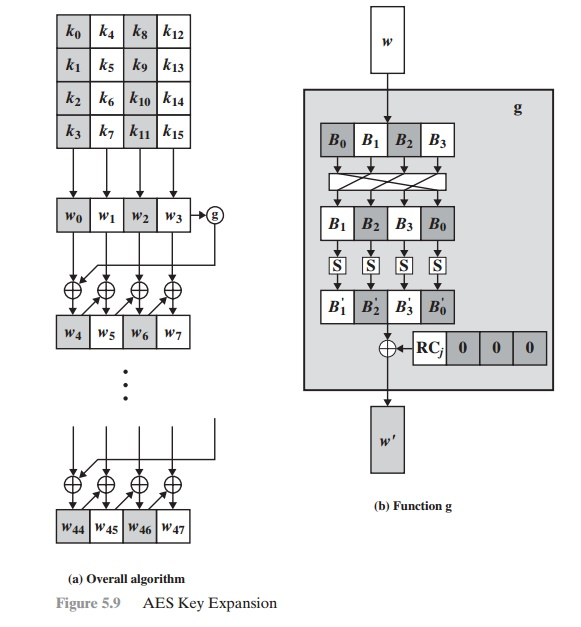

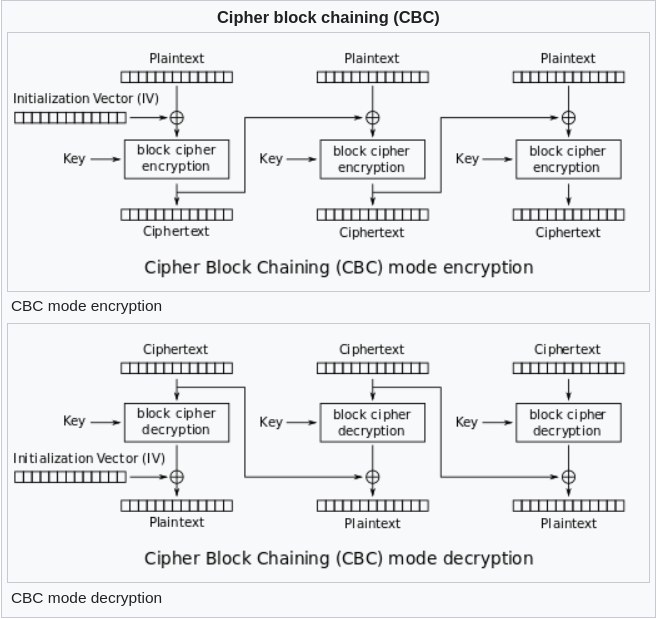

each block is XORed with the ciphertext of the previous block, not the plaintext

In [13]:
class AES:
    """
    Class for AES-128 encryption with CBC mode and PKCS#7.

    This is a raw implementation of AES, without key stretching or IV
    management. Unless you need that, please use `encrypt` and `decrypt`.
    """
    rounds_by_key_size = {16: 10, 24: 12, 32: 14}
    def __init__(self, master_key):
        """
        Initializes the object with a given key.
        """
        assert len(master_key) in AES.rounds_by_key_size
        
        print(f"Master key: {master_key}\nKey size: {len(master_key)}\n")
        
        #specifiying the number of rounds based on the key size
        self.n_rounds = AES.rounds_by_key_size[len(master_key)]
        print(f"Number of rounds: {self.n_rounds}\n")
        
        # Expanding the key into 10/12/14 round keys
        self._key_matrices = self._expand_key(master_key)
        print(f"Key matrices: {self._key_matrices}\n")
        print(f"Key matrices length: {len(self._key_matrices)}\n")

    def _expand_key(self, master_key):
        """
        Expands and returns a list of key matrices for the given master_key.
        """
        # Initialize round keys with raw key material.
        # change to 4x4 matrix
        key_columns = bytes2matrix(master_key)
        iteration_size = len(master_key) // 4

        i = 1
        while len(key_columns) < (self.n_rounds + 1) * 4:
            # Copy previous word.
            word = list(key_columns[-1])

            # Perform schedule_core once every "row".
            # G Function
            if len(key_columns) % iteration_size == 0:
                # Circular shift.
                word.append(word.pop(0))
                # Map to S-BOX.
                word = [s_box[b] for b in word]
                # XOR with first byte of R-CON, since the others bytes of R-CON are 0.
                word[0] ^= r_con[i]
                i += 1
            elif len(master_key) == 32 and len(key_columns) % iteration_size == 4:
                # Run word through S-box in the fourth iteration when using a
                # 256-bit key.
                word = [s_box[b] for b in word]

            # XOR with equivalent word from previous iteration.
            word = xor_bytes(word, key_columns[-iteration_size])
            key_columns.append(word)

        # Group key words in 4x4 byte matrices.
        return [key_columns[4*i : 4*(i+1)] for i in range(len(key_columns) // 4)]

    def encrypt_block(self, plaintext):
        """
        Encrypts a single block of 16 byte long plaintext.
        """
        assert len(plaintext) == 16

        plain_state = bytes2matrix(plaintext)

        add_round_key(plain_state, self._key_matrices[0])

        for i in range(1, self.n_rounds):
            sub_bytes(plain_state)
            shift_rows(plain_state)
            mix_columns(plain_state)
            add_round_key(plain_state, self._key_matrices[i])

        sub_bytes(plain_state)
        shift_rows(plain_state)
        add_round_key(plain_state, self._key_matrices[-1])

        return matrix2bytes(plain_state)

    def decrypt_block(self, ciphertext):
        """
        Decrypts a single block of 16 byte long ciphertext.
        """
        assert len(ciphertext) == 16

        cipher_state = bytes2matrix(ciphertext)

        add_round_key(cipher_state, self._key_matrices[-1])
        inv_shift_rows(cipher_state)
        inv_sub_bytes(cipher_state)

        for i in range(self.n_rounds - 1, 0, -1):
            add_round_key(cipher_state, self._key_matrices[i])
            mix_columns(cipher_state)
            mix_columns(cipher_state)
            mix_columns(cipher_state)
            # Doing the mix columns three times is equal to using the reverse matrix
            inv_shift_rows(cipher_state)
            inv_sub_bytes(cipher_state)

        add_round_key(cipher_state, self._key_matrices[0])

        return matrix2bytes(cipher_state)

    def encrypt_cbc(self, plaintext, iv):
        """
        Encrypts `plaintext` using CBC mode and PKCS#7 padding, with the given
        initialization vector (iv).
        """
        assert len(iv) == 16

        plaintext = pad(plaintext)

        blocks = []
        previous = iv
        for plaintext_block in split_blocks(plaintext):
            # CBC mode encrypt: encrypt(plaintext_block XOR previous)
            block = self.encrypt_block(xor_bytes(plaintext_block, previous))
            blocks.append(block)
            previous = block

        return b''.join(blocks)

    def decrypt_cbc(self, ciphertext, iv):
        """
        Decrypts `ciphertext` using CBC mode and PKCS#7 padding, with the given
        initialization vector (iv).
        """
        assert len(iv) == 16

        blocks = []
        previous = iv
        for ciphertext_block in split_blocks(ciphertext):
            # CBC mode decrypt: previous XOR decrypt(ciphertext)
            blocks.append(xor_bytes(previous, self.decrypt_block(ciphertext_block)))
            previous = ciphertext_block

        return unpad(b''.join(blocks))


In [14]:
import os
from hashlib import pbkdf2_hmac
from hmac import new as new_hmac, compare_digest

AES_KEY_SIZE = 16
HMAC_KEY_SIZE = 16
IV_SIZE = 16

SALT_SIZE = 16
HMAC_SIZE = 32

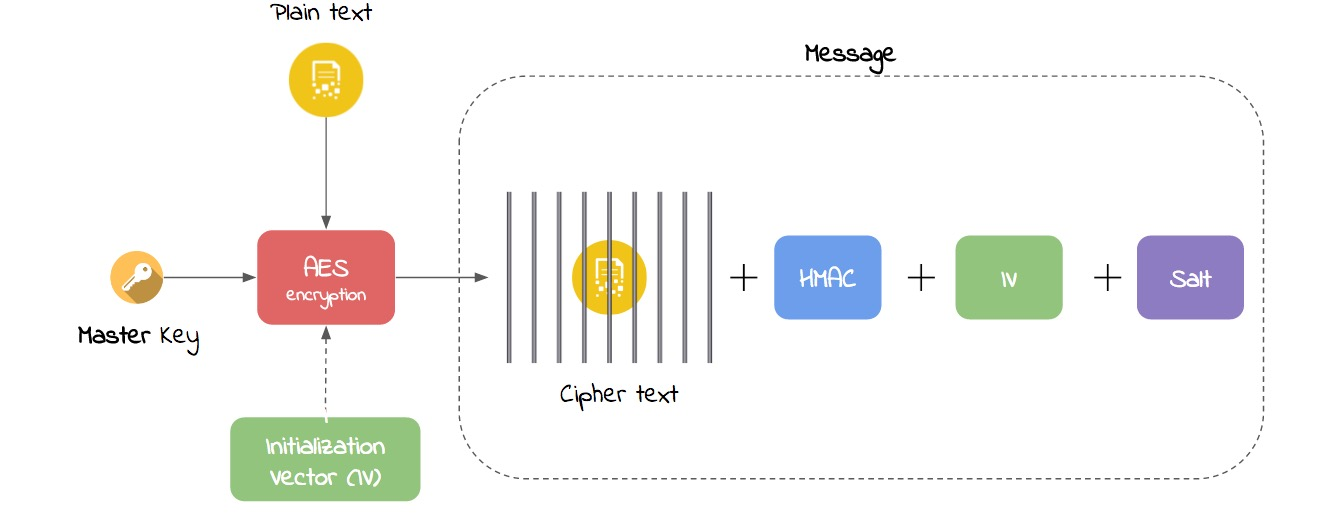

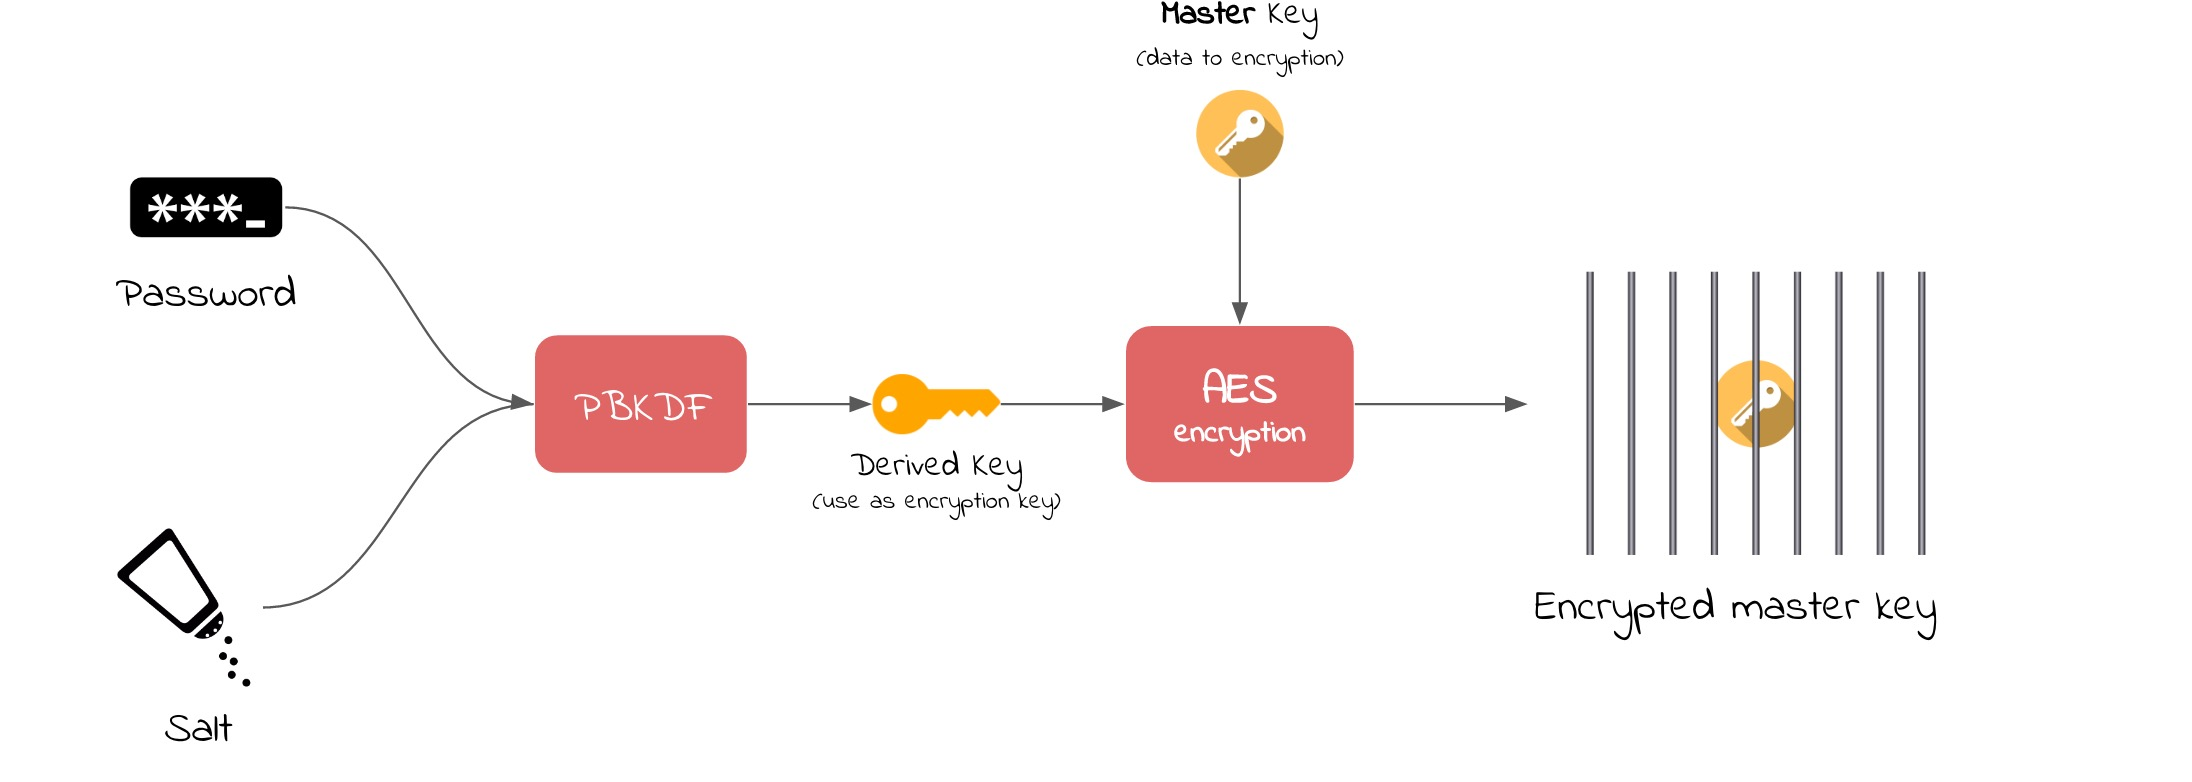

In [15]:
def get_key_iv(password, salt, workload=100000):
    """
    Stretches the password and extracts an AES key, an HMAC key and an AES
    initialization vector.
    Using Password based key derivation function, we try obtaining the AES key, HMAC key and IV
    """
    stretched = pbkdf2_hmac('sha256', password, salt, workload, AES_KEY_SIZE + IV_SIZE + HMAC_KEY_SIZE)
    aes_key, stretched = stretched[:AES_KEY_SIZE], stretched[AES_KEY_SIZE:]
    hmac_key, stretched = stretched[:HMAC_KEY_SIZE], stretched[HMAC_KEY_SIZE:]
    iv = stretched[:IV_SIZE]
    return aes_key, hmac_key, iv

In [16]:
def encrypt(key, plaintext, workload=100000):
    """
    Encrypts `plaintext` with `key` using AES-128, an HMAC to verify integrity,
    and PBKDF2 to stretch the given key.

    The exact algorithm is specified in the module docstring.
    """
    if isinstance(key, bytes):
        salt = os.urandom(SALT_SIZE)
        print(f"Salt : {salt}\n")
        key, hmac_key, iv = get_key_iv(key, salt, workload)
        print(f"Key : {key}\n")
        print(f"hmac_key : {hmac_key}\n")
        print(f"iv : {iv}")
        ciphertext = AES(key).encrypt_cbc(plaintext, iv)
        hmac = new_hmac(hmac_key, salt + ciphertext, 'sha256').digest()
        assert len(hmac) == HMAC_SIZE

        return hmac + salt + ciphertext
    if isinstance(key, str):
        key = key.encode('utf-8')
    if isinstance(plaintext, str):
        plaintext = plaintext.encode('utf-8')

    salt = os.urandom(SALT_SIZE)
    print(f"Salt : {salt}\n")
    key, hmac_key, iv = get_key_iv(key, salt, workload)
    print(f"Key : {key}\n")
    print(f"hmac_key : {hmac_key}\n")
    print(f"iv : {iv}")
    ciphertext = AES(key).encrypt_cbc(plaintext, iv)
    hmac = new_hmac(hmac_key, salt + ciphertext, 'sha256').digest()
    assert len(hmac) == HMAC_SIZE

    return hmac + salt + ciphertext

In [17]:
plaintext = "Three nine two five"
plaintext.encode('utf-8')

b'Three nine two five'

In [18]:
key = "hello world"
key.encode('utf-8')

b'hello world'

In [19]:
def decrypt(key, ciphertext, workload=100000):
    """
    Decrypts `ciphertext` with `key` using AES-128, an HMAC to verify integrity,
    and PBKDF2 to stretch the given key.

    The exact algorithm is specified in the module docstring.
    """

    assert len(ciphertext) % 16 == 0, "Ciphertext must be made of full 16-byte blocks."

    assert len(ciphertext) >= 32, """
    Ciphertext must be at least 32 bytes long (16 byte salt + 16 byte block). To
    encrypt or decrypt single blocks use `AES(key).decrypt_block(ciphertext)`.
    """

    if isinstance(key, str):
        key = key.encode('utf-8')

    hmac, ciphertext = ciphertext[:HMAC_SIZE], ciphertext[HMAC_SIZE:]
    salt, ciphertext = ciphertext[:SALT_SIZE], ciphertext[SALT_SIZE:]
    key, hmac_key, iv = get_key_iv(key, salt, workload)

    expected_hmac = new_hmac(hmac_key, salt + ciphertext, 'sha256').digest()
    assert compare_digest(hmac, expected_hmac), 'Ciphertext corrupted or tampered.'

    return AES(key).decrypt_cbc(ciphertext, iv)

In [20]:
ciphertext = encrypt(key, plaintext)
print("Cipher text : ",ciphertext)

Salt : b'yNf\xed\xaa\xfaY](W^\x88\xb0\xcd\x8e\xfc'

Key : b"$5\xd3\xae\xd0\x90m\x9d'0opE\xda\xc67"

hmac_key : b'n6u\x92m\xd1\xd1\xeahra\x14\xc6\xe6\xf54'

iv : b'\xed\xef>\x8c\x87\x0c\x83\x9f\x0c\xaaD\x89\x10F\x95\x82'
Master key: b"$5\xd3\xae\xd0\x90m\x9d'0opE\xda\xc67"
Key size: 16

Number of rounds: 10

Key matrices: [[[36, 53, 211, 174], [208, 144, 109, 157], [39, 48, 111, 112], [69, 218, 198, 55]], [b'r\x81I\xc0', b'\xa2\x11$]', b'\x85!K-', b'\xc0\xfb\x8d\x1a'], [b'\x7f\xdc\xebz', b"\xdd\xcd\xcf'", b'X\xec\x84\n', b'\x98\x17\t\x10'], [b'\x8b\xdd!<', b'V\x10\xee\x1b', b'\x0e\xfcj\x11', b'\x96\xebc\x01'], [b'j&]\xac', b'<6\xb3\xb7', b'2\xca\xd9\xa6', b'\xa4!\xba\xa7'], [b'\x87\xd2\x01\xe5', b'\xbb\xe4\xb2R', b'\x89.k\xf4', b'-\x0f\xd1S'], [b'\xd1\xec\xec=', b'j\x08^o', b'\xe3&5\x9b', b'\xce)\xe4\xc8'], [b'4\x85\x04\xb6', b'^\x8dZ\xd9', b'\xbd\xaboB', b's\x82\x8b\x8a'], [b'\xa7\xb8z9', b'\xf95 \xe0', b'D\x9eO\xa2', b'7\x1c\xc4('], [b' \xa4N\xa3', b'\xd9\x91nC', b'\x9d\x0f!\xe1', b'\

In [21]:
decrypted = decrypt(key, ciphertext)
print("Decrypted text : ",decrypted)

Master key: b"$5\xd3\xae\xd0\x90m\x9d'0opE\xda\xc67"
Key size: 16

Number of rounds: 10

Key matrices: [[[36, 53, 211, 174], [208, 144, 109, 157], [39, 48, 111, 112], [69, 218, 198, 55]], [b'r\x81I\xc0', b'\xa2\x11$]', b'\x85!K-', b'\xc0\xfb\x8d\x1a'], [b'\x7f\xdc\xebz', b"\xdd\xcd\xcf'", b'X\xec\x84\n', b'\x98\x17\t\x10'], [b'\x8b\xdd!<', b'V\x10\xee\x1b', b'\x0e\xfcj\x11', b'\x96\xebc\x01'], [b'j&]\xac', b'<6\xb3\xb7', b'2\xca\xd9\xa6', b'\xa4!\xba\xa7'], [b'\x87\xd2\x01\xe5', b'\xbb\xe4\xb2R', b'\x89.k\xf4', b'-\x0f\xd1S'], [b'\xd1\xec\xec=', b'j\x08^o', b'\xe3&5\x9b', b'\xce)\xe4\xc8'], [b'4\x85\x04\xb6', b'^\x8dZ\xd9', b'\xbd\xaboB', b's\x82\x8b\x8a'], [b'\xa7\xb8z9', b'\xf95 \xe0', b'D\x9eO\xa2', b'7\x1c\xc4('], [b' \xa4N\xa3', b'\xd9\x91nC', b'\x9d\x0f!\xe1', b'\xaa\x13\xe5\xc9'], [b'k}\x93\x0f', b'\xb2\xec\xfdL', b'/\xe3\xdc\xad', b'\x85\xf09d']]

Key matrices length: 11

Decrypted text :  b'Three nine two five'
